# TRABAJO PRÁCTICO - APRENDIZAJE AUTOMÁTICO

Theo Francisco Jorge Resende




In [1]:

#!pip install pycaret[full]
!pip install git+https://github.com/pycaret/pycaret.git@master --upgrade

  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-s25vqnsl
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-s25vqnsl
  Resolved https://github.com/pycaret/pycaret.git to commit 58ec3c282d58e94727f9d5b77b49f241e9103ab3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━

El primer paso es **identificar el problema**

Nuestro objetivo es predecir el precio de los jugadores de futbol teniendo en cuenta su carta en el Fifa para comparar un poco lo de ficticio de la realidad.

El dataset que estamos usando lo obtuvimos de **Kaggle** y es este https://www.kaggle.com/datasets/aniss7/fifa-player-data-from-sofifa-2025-06-03, sumado a un dataset scrapeado por nosotros

In [1]:
import pandas as pd
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aniss7/fifa-player-data-from-sofifa-2025-06-03")

print("Path to dataset files:", path)

# Listar archivos para ver cuál es el CSV
print("Archivos en el dataset:", os.listdir(path))





100%|██████████| 2.06M/2.06M [00:00<00:00, 36.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/aniss7/fifa-player-data-from-sofifa-2025-06-03/versions/1
Archivos en el dataset: ['player-data-full-2025-june.csv']


In [2]:

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
csv_path = os.path.join(path, "player-data-full-2025-june.csv")

# Leer CSV directamente
data = pd.read_csv(csv_path)

print(data.head(10))

   player_id     version                              name  \
0     231866  2025-06-03                           Rodri -   
1     209331  2025-06-03       Mohamed Salah Hamed Ghaly -   
2     252371  2025-06-03  Jude Victor William Bellingham -   
3     239085  2025-06-03             Erling Braut Håland -   
4     238794  2025-06-03                        Vini Jr. -   
5     231747  2025-06-03            Kylian Mbappé Lottin -   
6     203376  2025-06-03                 Virgil van Dijk -   
7     202126  2025-06-03               Harry Edward Kane -   
8     256630  2025-06-03           Florian Richard Wirtz -   
9     212831  2025-06-03                         Alisson -   

                                  full_name  \
0                Rodrigo Hernández Cascante   
1        Mohamed Salah Hamed Ghalyمحمد صلاح   
2            Jude Victor William Bellingham   
3                       Erling Braut Håland   
4   Vinicius José Paixão de Oliveira Junior   
5                      Kylian Mbapp

/tmp/ipython-input-2-3853444179.py:6: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_path)


In [3]:

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18205 entries, 0 to 18204
Data columns (total 76 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  18205 non-null  int64  
 1   version                    18205 non-null  object 
 2   name                       18205 non-null  object 
 3   full_name                  18205 non-null  object 
 4   description                18205 non-null  object 
 5   image                      18205 non-null  object 
 6   height_cm                  18205 non-null  int64  
 7   weight_kg                  18205 non-null  int64  
 8   dob                        18205 non-null  object 
 9   positions                  18205 non-null  object 
 10  overall_rating             18205 non-null  int64  
 11  potential                  18205 non-null  int64  
 12  value                      18205 non-null  object 
 13  wage                       18205 non-null  obj

#Nos quedamos con las features mas importantes, y descartamos las demas las cuales no nos son relevantes. Tambien descartamos todas las filas con datos Nan y vamos a descartar a los arqueros




In [4]:
# Selecciona solo las columnas deseadas
data = data[~data['positions'].str.contains('GK', na=False)].copy()

categorical_features = ['club_league_name', 'preferred_foot', 'positions']
numeric_features = ['height_cm', 'weight_kg', 'weak_foot', 'skill_moves', 'overall_rating',  'player_id' ]
columns_to_keep = ['value'] + categorical_features + numeric_features
data = data[columns_to_keep].copy()


for col in numeric_features:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data = data.dropna(subset=columns_to_keep)


print(data.head(10))
print(data.info())


      value club_league_name preferred_foot positions  height_cm  weight_kg  \
0   €115.5M   Premier League          Right    CDM,CM        190         82   
1     €104M   Premier League           Left     RM,RW        175         72   
2   €174.5M          La Liga          Right    CAM,CM        186         75   
3     €157M   Premier League           Left        ST        195         94   
4   €171.5M          La Liga          Right     LW,ST        176         73   
5     €160M          La Liga          Right     ST,LW        182         75   
6    €77.5M   Premier League          Right        CB        193         92   
7   €117.5M       Bundesliga          Right        ST        188         86   
8   €143.5M       Bundesliga          Right    CAM,ST        177         71   
10   €63.5M   Premier League          Right    CM,CAM        181         75   

    weak_foot  skill_moves  overall_rating  player_id  
0         4.0            3              91     231866  
1         3.0     

Pasamos el precio de mercado a un valor númerico


In [5]:
def parse_value(value_str):
    if isinstance(value_str, str):
        value_str = value_str.replace('€', '').replace(',', '').strip()
        if value_str.endswith('M'):
            return float(value_str[:-1]) * 1_000_000
        elif value_str.endswith('K'):
            return float(value_str[:-1]) * 1_000
        else:
            try:
                return float(value_str)
            except ValueError:
                return None
    return value_str

data['value'] = data['value'].apply(parse_value)

Cargamos el otro dataset que contiene la edad y los atributos generales

In [6]:
# Carga tu segundo CSV
try:
    df_otros_datos = pd.read_csv('player-data-full.csv')
except FileNotFoundError:
    print("\nError: Asegúrate de que 'otro_csv.csv' esté en el directorio correcto o especifica la ruta completa.")
    # Crea un DataFrame de ejemplo si el archivo no se encuentra para que el código sea ejecutable
    df_otros_datos = pd.DataFrame({
        'player_id': [1, 3, 5, 8, 9],
        'age': [25, 28, 27, 30, 22],
        'contract_until': [2026, 2027, 2025, 2028, 2024]
    })
    print("\nSe ha creado un DataFrame de ejemplo para 'otros_datos'.")


# Asegurarse de que 'player_id' sea numérico en ambos DataFrames antes de la fusión
df_otros_datos['player_id'] = pd.to_numeric(df_otros_datos['player_id'], errors='coerce')
data['player_id'] = pd.to_numeric(data['player_id'], errors='coerce')

# Eliminar NaNs que puedan haber surgido por la conversión a numérico
df_otros_datos.dropna(subset=['player_id'], inplace=True)
data.dropna(subset=['player_id'], inplace=True)

# Convertir 'player_id' a tipo entero después de la limpieza de NaNs para evitar problemas
df_otros_datos['player_id'] = df_otros_datos['player_id'].astype(int)
data['player_id'] = data['player_id'].astype(int)


# Realizar un merge "left" para mantener todos los IDs de tu 'data' original
# y añadir una columna indicadora para ver de dónde vienen las filas.
merged_data = pd.merge(data, df_otros_datos, on='player_id', how='left', indicator=True)

# Identificar los IDs de 'data' que no estaban en 'df_otros_datos'
# Estos serán aquellos con '_merge' == 'left_only'
ids_no_encontrados = merged_data[merged_data['_merge'] == 'left_only']['player_id'].unique()

print("\n--- IDs de tu DataFrame original que no estaban en el otro CSV: ---")
print(f"Total de IDs no encontrados: {len(ids_no_encontrados)}")
print("Lista de IDs no encontrados:")
if len(ids_no_encontrados) > 0:
    print(ids_no_encontrados)
else:
    print("¡Todos los IDs de tu DataFrame original se encontraron en el otro CSV!")

print("\n--- Primeras 10 filas del DataFrame fusionado: ---")
print(merged_data.head(10))
print("\n--- Información del DataFrame fusionado: ---")
print(merged_data.info())


--- IDs de tu DataFrame original que no estaban en el otro CSV: ---
Total de IDs no encontrados: 2
Lista de IDs no encontrados:
[202017  73505]

--- Primeras 10 filas del DataFrame fusionado: ---
         value club_league_name preferred_foot positions  height_cm  \
0  115500000.0   Premier League          Right    CDM,CM        190   
1  104000000.0   Premier League           Left     RM,RW        175   
2  174500000.0          La Liga          Right    CAM,CM        186   
3  157000000.0   Premier League           Left        ST        195   
4  171500000.0          La Liga          Right     LW,ST        176   
5  160000000.0          La Liga          Right     ST,LW        182   
6   77500000.0   Premier League          Right        CB        193   
7  117500000.0       Bundesliga          Right        ST        188   
8  143500000.0       Bundesliga          Right    CAM,ST        177   
9   63500000.0   Premier League          Right    CM,CAM        181   

   weight_kg  weak_fo

## Variable a predecir
- value_eur (precio)

## Features Cuantitativos


*  age (Edad)
*  height_cm (Altura)
*  weight_kg (Peso)
*  weak_foot (Habilidad con la pierna mala)

* skill_moves (Habilidad de regate)
* overrall_rating (Media total)
* pace (Velocidad)
* shooting (Tiro)
* passing (Pase)
* dribbling (Drible)
* defending (Defensa)
* physic (Físico)







## Features Cualitativos
*  preferred_foot (Pie Habil)
*  positions (Posiciones del jugador)
*  club_league_name (Nombre de la liga)


In [7]:

data = merged_data
data = data.drop("_merge", axis=1)
data = data.drop("player_id", axis=1)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16217 entries, 0 to 16216
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   value             16217 non-null  float64
 1   club_league_name  16217 non-null  object 
 2   preferred_foot    16217 non-null  object 
 3   positions         16217 non-null  object 
 4   height_cm         16217 non-null  int64  
 5   weight_kg         16217 non-null  int64  
 6   weak_foot         16217 non-null  float64
 7   skill_moves       16217 non-null  int64  
 8   overall_rating    16217 non-null  int64  
 9   age               16215 non-null  float64
 10  pace              16215 non-null  float64
 11  shooting          16215 non-null  float64
 12  passing           16215 non-null  float64
 13  dribbling         16215 non-null  float64
 14  defending         16215 non-null  float64
 15  physic            16215 non-null  float64
dtypes: float64(9), int64(4), object(3)
memor

## Datos nulos

In [8]:
print(data.isnull().sum())
data = data.dropna()

value               0
club_league_name    0
preferred_foot      0
positions           0
height_cm           0
weight_kg           0
weak_foot           0
skill_moves         0
overall_rating      0
age                 2
pace                2
shooting            2
passing             2
dribbling           2
defending           2
physic              2
dtype: int64


## Datos duplicados

In [9]:
duplicados = data.duplicated()
print(duplicados)
print(duplicados.any())


0        False
1        False
2        False
3        False
4        False
         ...  
16212    False
16213    False
16214    False
16215    False
16216    False
Length: 16215, dtype: bool
True


In [10]:
data = data.drop_duplicates()
duplicados = data.duplicated()
print(duplicados)
print(duplicados.any())

0        False
1        False
2        False
3        False
4        False
         ...  
16212    False
16213    False
16214    False
16215    False
16216    False
Length: 16104, dtype: bool
False


## ¿Está balanceado el dataset elegido?

In [11]:
print(data['value'].describe())

count    1.610400e+04
mean     3.111902e+06
std      8.065818e+06
min      0.000000e+00
25%      5.250000e+05
50%      1.100000e+06
75%      2.200000e+06
max      1.745000e+08
Name: value, dtype: float64


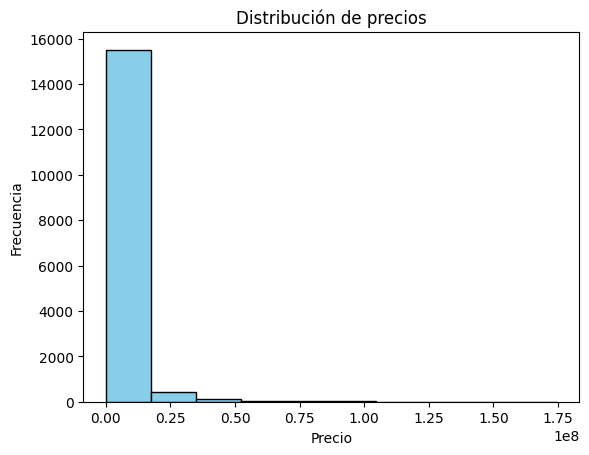

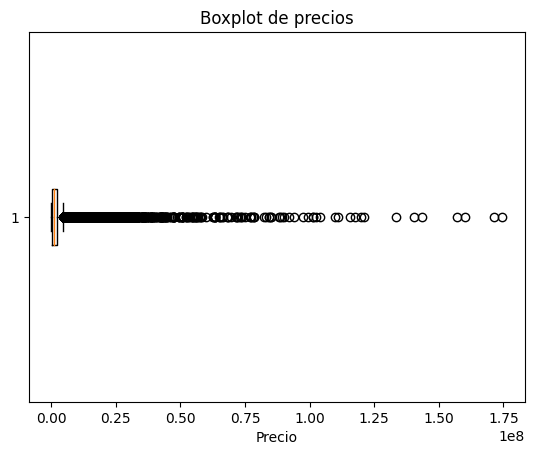

In [12]:
import matplotlib.pyplot as plt


plt.hist(data['value'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()


plt.boxplot(data['value'], vert=False)
plt.title('Boxplot de precios')
plt.xlabel('Precio')
plt.show()


No balancear el dataset es preferible en este caso porque preserva la integridad de los valores altos, evita la pérdida de información valiosa y aprovecha el peso balanceado del clasificador para manejar el desbalanceo natural. Esta decisión respalda un modelo que puede predecir con precisión tanto los valores bajos como los altos, especialmente los más extremos, sin introducir artefactos artificiales. Si es necesario, se pueden optimizar los hiperparámetros o explorar umbrales personalizados para mejorar el rendimiento en los valores altos sin recurrir al balanceo.

#Uso PyCaret

Se utiliza PyCaret para poder obtener una comparación entre distintos modelos y ver cuál es el mejor

In [ ]:

from pycaret.regression import *

exp = setup(data,
            target='value',
            normalize=True,
            transformation=True,
            fold=10)

,Description,Value
0,Session id,4200
1,Target,value
2,Target type,Regression
3,Original data shape,"(16104, 16)"
4,Transformed data shape,"(16104, 16)"
5,Transformed train set shape,"(11272, 16)"
6,Transformed test set shape,"(4832, 16)"
7,Numeric features,12
8,Categorical features,3
9,Preprocess,True


## Vamos a comparar los modelos de Linear Regression, RandomForest Regressor, LightGBM y XGBoost

In [ ]:
models_to_use = ['lr', 'rf', 'xgboost', 'lightgbm']
best_model = compare_models(include=models_to_use)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,256806.3625,1534550786048.0000,1163570.4844,0.9791,0.3050,0.0861,0.6230
rf,Random Forest Regressor,261650.6252,2072317839767.2605,1341423.0868,0.9725,0.2991,0.0713,6.7150
lightgbm,Light Gradient Boosting Machine,281758.7237,2845551185979.2153,1570656.0506,0.9635,0.3328,0.0930,0.7800
lr,Linear Regression,3380932.9961,45858219618309.9609,6732420.8236,0.3538,1.4626,4.6371,1.1570


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

### Display de los scores de forma prolija

In [ ]:
model_scores = pull()
model_scores = model_scores[['Model', 'RMSE', 'R2', 'MAE', 'MSE']]
model_scores.style.format({'RMSE': '{:,.2f}', 'R2': '{:.2f}', 'MAE': '{:.2f}', 'MSE': '{:.2f}'})

,Model,RMSE,R2,MAE,MSE
xgboost,Extreme Gradient Boosting,"1,163,570.48",0.98,256806.36,1534550786048.00
rf,Random Forest Regressor,"1,341,423.09",0.97,261650.63,2072317839767.26
lightgbm,Light Gradient Boosting Machine,"1,570,656.05",0.96,281758.72,2845551185979.22
lr,Linear Regression,"6,732,420.82",0.35,3380933.00,45858219618309.96


In [ ]:

best_model = tune_model(best_model, optimize='r2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,265720.0000,2227530891264.0000,1492491.5000,0.9774,0.1517,0.0874
1,243859.6250,3427587325952.0000,1851374.5000,0.9573,0.2047,0.0930
2,260533.4375,917374107648.0000,957796.5000,0.9851,0.5987,0.0965
3,247637.6094,1304351342592.0000,1142082.0000,0.9850,0.4059,0.0846
4,173027.8281,383539773440.0000,619305.8750,0.9915,0.4232,0.0871
5,273564.9062,2496604930048.0000,1580064.8750,0.9626,0.4086,0.0821
6,209856.8594,528397041664.0000,726909.2500,0.9908,0.1144,0.0811
7,224372.9844,467060293632.0000,683418.1250,0.9934,0.1139,0.0844
8,255717.1094,1513744236544.0000,1230343.1250,0.9765,0.4118,0.0849


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
final_model = evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
final_model = best_model
X = data.drop('value', axis=1)
predictions = predict_model(final_model, X)

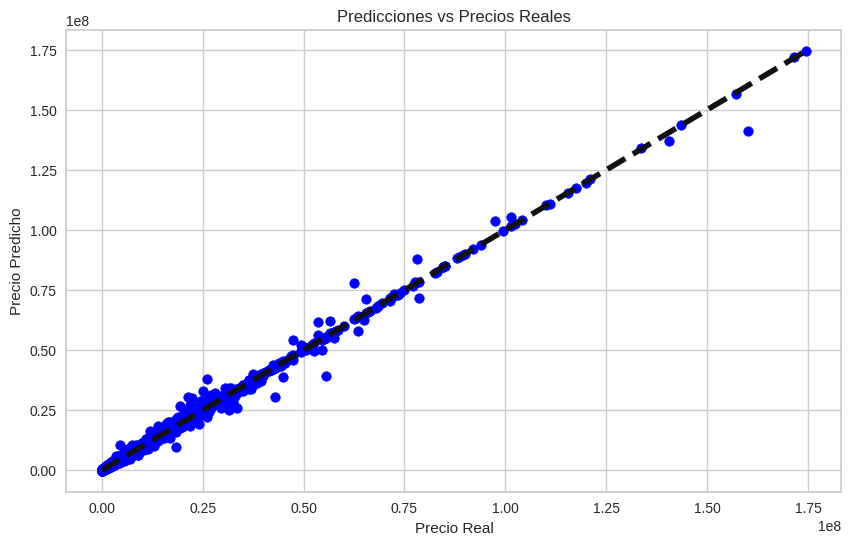

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(data['value'], predictions['prediction_label'], color='blue')
plt.plot([data['value'].min(), data['value'].max()],
         [data['value'].min(), data['value'].max()], 'k--', lw=4)
plt.title('Predicciones vs Precios Reales')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.show()


Este modelo usando aprendizaje automatico es muy bueno, pero vamos a profundizar con hiperparámetros para encontrar uno mejor


# Uso del método tradicional

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import xgboost as xgb

## Preprocessing and OneHotEncoding and MultilabelBinarizer

Usamos MultiLabelBinarizer para las posiciones, asi podemos dividirlas en columnnas, a las ligas tambien pero no todas ya que es innecesario y aumenta demasiado las dimensiones, y para el pie habil con un encoder binario podemos simplificarlos en 0 y 1


In [22]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer

def preprocess_data(data, target_col='value'):
    print("Preprocesando datos...")
    data_processed = data.copy()

    # Identificar columnas categóricas y numéricas
    categorical_cols = data_processed.select_dtypes(include=['object']).columns.tolist()
    numerical_cols = data_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Remover target de las listas si está presente
    if target_col in categorical_cols:
        categorical_cols.remove(target_col)
    if target_col in numerical_cols:
        numerical_cols.remove(target_col)

    # Extraer columnas especiales
    special_multi_col = 'positions'
    binary_col = 'preferred_foot'
    league_col = 'club_league_name'

    for col in [special_multi_col, binary_col, league_col]:
        if col in categorical_cols:
            categorical_cols.remove(col)

    print(f"Columnas categóricas: {categorical_cols}")
    print(f"Columnas numéricas: {numerical_cols}")

    # Manejar valores nulos
    print("Manejando valores nulos...")

    for col in categorical_cols:
        if data_processed[col].isnull().any():
            print(f"  {col}: {data_processed[col].isnull().sum()} nulos -> rellenando con 'Unknown'")
            data_processed[col] = data_processed[col].fillna('Unknown')

    for col in numerical_cols:
        if data_processed[col].isnull().any():
            median_val = data_processed[col].median()
            print(f"  {col}: {data_processed[col].isnull().sum()} nulos -> rellenando con {median_val}")
            data_processed[col] = data_processed[col].fillna(median_val)

    # Codificar variables categóricas con OneHotEncoder
    print("Codificando variables categóricas con OneHotEncoder...")
    onehot_encoders = {}

    for col in categorical_cols:
        data_processed[col] = data_processed[col].fillna('Unknown')
        ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
        encoded_cols = ohe.fit_transform(data_processed[[col]])
        col_names = [f"{col}_{category}" for category in ohe.categories_[0][1:]]
        encoded_df = pd.DataFrame(encoded_cols, columns=col_names, index=data_processed.index)
        data_processed = data_processed.drop(columns=[col])
        data_processed = pd.concat([data_processed, encoded_df], axis=1)
        onehot_encoders[col] = ohe
        print(f"  {col}: convertido a {len(ohe.categories_[0])-1} columnas binarias (drop_first=True)")

    # Codificar preferred_foot como binario
    if binary_col in data.columns:
        print(f"Codificando '{binary_col}' como binario...")
        data_processed[binary_col] = data_processed[binary_col].fillna('Unknown')
        data_processed[binary_col] = data_processed[binary_col].map({'Left': 0, 'Right': 1}).fillna(-1).astype(int)

    # Codificar club_league_name solo para top 10 ligas por valor total
    if league_col in data.columns:
        print(f"Codificando '{league_col}' solo para top 14 ligas por valor total...")
        league_value_sum = data.groupby(league_col)[target_col].sum().sort_values(ascending=False)
        top_leagues = league_value_sum.head(14).index.tolist()
        data_processed[league_col] = data_processed[league_col].fillna('Unknown')
        data_processed[league_col] = data_processed[league_col].apply(lambda x: x if x in top_leagues else 'Other')

        ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
        encoded_cols = ohe.fit_transform(data_processed[[league_col]])
        col_names = [f"{league_col}_{category}" for category in ohe.categories_[0][1:]]
        encoded_df = pd.DataFrame(encoded_cols, columns=col_names, index=data_processed.index)
        data_processed = data_processed.drop(columns=[league_col])
        data_processed = pd.concat([data_processed, encoded_df], axis=1)
        onehot_encoders[league_col] = ohe
        print(f"  {league_col}: top 14 ligas codificadas, resto agrupado como 'Other'")

    # Procesar columna multilabel: player_positions
    mlb = None
    if special_multi_col in data.columns:
        print(f"Procesando columna multilabel '{special_multi_col}' con MultiLabelBinarizer...")
        data_processed[special_multi_col] = data_processed[special_multi_col].fillna('Unknown')
        multilabel_values = data_processed[special_multi_col].str.split(',\s*')
        mlb = MultiLabelBinarizer()
        position_dummies = pd.DataFrame(mlb.fit_transform(multilabel_values),
                                        columns=[f"pos_{cls}" for cls in mlb.classes_],
                                        index=data_processed.index)
        data_processed = pd.concat([data_processed.drop(columns=[special_multi_col]), position_dummies], axis=1)
        print(f"  {special_multi_col}: convertido a {len(mlb.classes_)} columnas binarias")

    # Convertir target a numérico si es necesario
    if target_col in data_processed.columns:
        if data_processed[target_col].dtype == 'object':
            print(f"ADVERTENCIA: Target '{target_col}' es categórico, intentando convertir a numérico...")
            data_processed[target_col] = pd.to_numeric(data_processed[target_col], errors='coerce')

    print(f"Datos preprocesados: {data_processed.shape}")
    print(f"Tipos de datos finales:")
    print(data_processed.dtypes.value_counts())

    return data_processed, onehot_encoders, mlb

In [25]:
target_col = 'value'

In [26]:
data_processed, label_encoders, mlb = preprocess_data(data, target_col)

# Verificar que el target existe y es numérico
if target_col not in data_processed.columns:
  raise ValueError(f"Columna target '{target_col}' no encontrada")

if data_processed[target_col].isnull().any():
  print(f"ADVERTENCIA: Target tiene {data_processed[target_col].isnull().sum()} valores nulos")
  data_processed = data_processed.dropna(subset=[target_col])

Preprocesando datos...
Columnas categóricas: []
Columnas numéricas: ['height_cm', 'weight_kg', 'weak_foot', 'skill_moves', 'overall_rating', 'age', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
Manejando valores nulos...
Codificando variables categóricas con OneHotEncoder...
Codificando 'preferred_foot' como binario...
Codificando 'club_league_name' solo para top 14 ligas por valor total...
  club_league_name: top 14 ligas codificadas, resto agrupado como 'Other'
Procesando columna multilabel 'positions' con MultiLabelBinarizer...
  positions: convertido a 12 columnas binarias
Datos preprocesados: (16104, 40)
Tipos de datos finales:
float64    23
int64      17
Name: count, dtype: int64


In [27]:
print(data_processed.head(10))
print(data_processed.info)

         value  preferred_foot  height_cm  weight_kg  weak_foot  skill_moves  \
0  115500000.0               1        190         82        4.0            3   
1  104000000.0               0        175         72        3.0            4   
2  174500000.0               1        186         75        4.0            4   
3  157000000.0               0        195         94        3.0            3   
4  171500000.0               1        176         73        4.0            5   
5  160000000.0               1        182         75        4.0            5   
6   77500000.0               1        193         92        3.0            2   
7  117500000.0               1        188         86        4.0            3   
8  143500000.0               1        177         71        4.0            4   
9   63500000.0               1        181         75        5.0            4   

   overall_rating   age  pace  shooting  passing  dribbling  defending  \
0              91  28.0  66.0      80.0     8

## XGBoost


In [28]:
from sklearn.model_selection import train_test_split

X = data_processed.drop(target_col, axis=1)
y = data_processed[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.25, random_state=15)

In [29]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import uniform, randint
import numpy as np

# Definir el modelo base
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=15, n_jobs=-1)

# Crear pipeline con escalador y regresor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', xgb_reg)
])

# Espacio de hiperparámetros para RandomizedSearchCV
param_distributions = {
    'regressor__learning_rate': uniform(0.01, 0.2),
    'regressor__max_depth': randint(3, 9),
    'regressor__n_estimators': randint(200, 501),
    'regressor__min_child_weight': randint(4, 15),
    'regressor__subsample': uniform(0.7, 0.3),
    'regressor__colsample_bytree': uniform(0.7, 0.3),
    'regressor__gamma': uniform(0, 3)
}

# Validación cruzada
cv = KFold(n_splits=10, shuffle=True, random_state=13)

# RandomizedSearchCV
rs = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=90,
    scoring='neg_mean_squared_error',
    cv=cv,
    verbose=2,
    random_state=15,
    n_jobs=1
)

# Entrenar modelo
rs.fit(X_train, y_train)

# Predicción
best_model = rs.best_estimator_
y_pred = best_model.predict(X_validation)
y_pred = np.maximum(y_pred, 0)

# Métricas
r2_val = r2_score(y_validation, y_pred)
mse_val = mean_squared_error(y_validation, y_pred)
mae_val = mean_absolute_error(y_validation, y_pred)

# Resultados
print(f"Train R²: {r2_score(y_train, best_model.predict(X_train)):.4f}")
print(f"R² (Validación): {r2_val:.4f}")
print(f"Mean Squared Error (MSE): {mse_val:.4f}")
print(f"Mean Absolute Error (MAE): {mae_val:.4f}")
print(f"Mejores hiperparámetros: {rs.best_params_}")


Fitting 10 folds for each of 90 candidates, totalling 900 fits
[CV] END regressor__colsample_bytree=0.9546453091805736, regressor__gamma=0.5366877747629955, regressor__learning_rate=0.02087264286128629, regressor__max_depth=7, regressor__min_child_weight=11, regressor__n_estimators=403, regressor__subsample=0.8590000674686276; total time=   0.9s
[CV] END regressor__colsample_bytree=0.9546453091805736, regressor__gamma=0.5366877747629955, regressor__learning_rate=0.02087264286128629, regressor__max_depth=7, regressor__min_child_weight=11, regressor__n_estimators=403, regressor__subsample=0.8590000674686276; total time=   1.8s
[CV] END regressor__colsample_bytree=0.9546453091805736, regressor__gamma=0.5366877747629955, regressor__learning_rate=0.02087264286128629, regressor__max_depth=7, regressor__min_child_weight=11, regressor__n_estimators=403, regressor__subsample=0.8590000674686276; total time=   1.9s
[CV] END regressor__colsample_bytree=0.9546453091805736, regressor__gamma=0.536687

## Evaluación de modelo

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

y_pred = best_model.predict(X_test)
y_pred = np.maximum(y_pred, 0)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir resultados
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 725537140494.4935
Mean Absolute Error (MAE): 230412.3837
R² Score: 0.9879


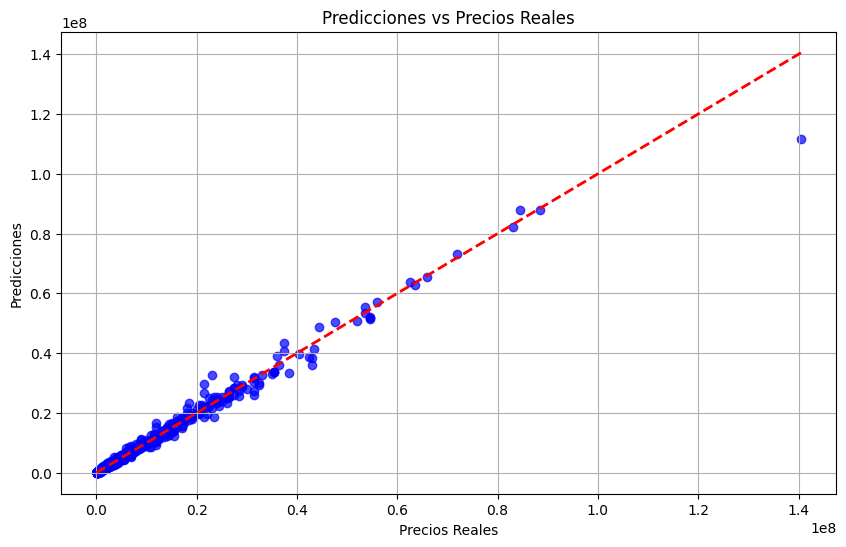

In [31]:
if len(y_pred) > len(y_test):
    y_pred = y_pred[:len(y_test)]


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Predicciones vs Precios Reales")
plt.xlabel("Precios Reales")
plt.ylabel("Predicciones")
plt.grid(True)
plt.show()

## ¿Qué features fueron las más relevantes y las menos relevantes para predecir el precio de los jugadores?

In [32]:
modelo_regresion = best_model.named_steps['regressor']

coeficientes = modelo_regresion.feature_importances_

TOP 15 FEATURES MÁS IMPORTANTES:
                            Feature  Coefficient  Abs_Coefficient
5                    overall_rating     0.860256         0.860256
6                               age     0.083489         0.083489
10                        dribbling     0.013953         0.013953
8                          shooting     0.008477         0.008477
15         club_league_name_La Liga     0.006268         0.006268
7                              pace     0.002541         0.002541
11                        defending     0.002082         0.002082
4                       skill_moves     0.002056         0.002056
2                         weight_kg     0.001864         0.001864
28                           pos_CB     0.001564         0.001564
12                           physic     0.001431         0.001431
29                          pos_CDM     0.001387         0.001387
30                           pos_CM     0.001303         0.001303
9                           passing     0.0

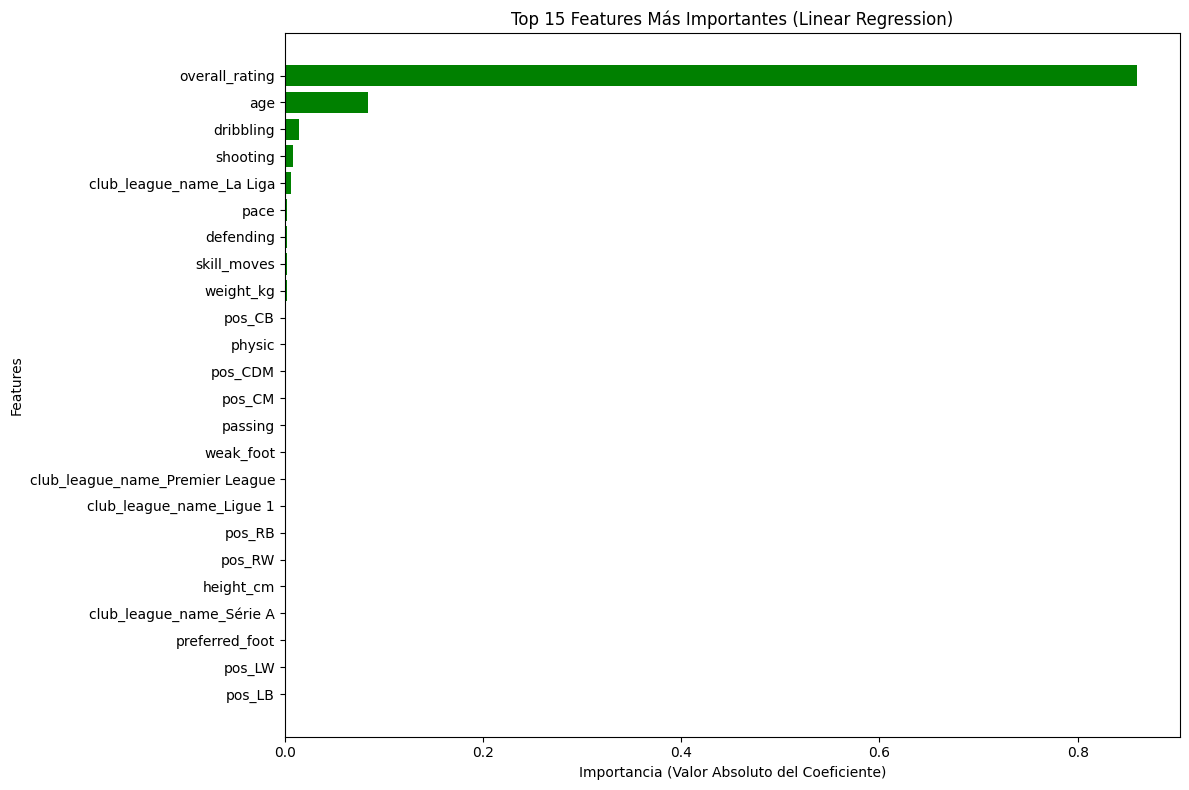

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

features = X_train.columns
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coeficientes
})

feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# CAMBIO: Tomar solo los top 15
top_15_features = feature_importance.head(-15)

print("TOP 15 FEATURES MÁS IMPORTANTES:")
print(top_15_features)


plt.figure(figsize=(12, 8))
plt.barh(top_15_features['Feature'], top_15_features['Abs_Coefficient'], color='green')
plt.gca().invert_yaxis()
plt.title('Top 15 Features Más Importantes (Linear Regression)')
plt.xlabel('Importancia (Valor Absoluto del Coeficiente)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


15 FEATURES MENOS IMPORTANTES:
                                        Feature  Coefficient  Abs_Coefficient
26                   club_league_name_Süper Lig     0.000000         0.000000
24                club_league_name_Super League     0.000000         0.000000
22                  club_league_name_Pro League     0.000000         0.000000
32                                      pos_LDM     0.000000         0.000000
18         club_league_name_Major League Soccer     0.000000         0.000000
13                club_league_name_Championship     0.000042         0.000042
16  club_league_name_Liga Profesional de Fútbol     0.000044         0.000044
14                  club_league_name_Eredivisie     0.000104         0.000104
27                                      pos_CAM     0.000123         0.000123
19                       club_league_name_Other     0.000149         0.000149
21               club_league_name_Primeira Liga     0.000213         0.000213
38                               

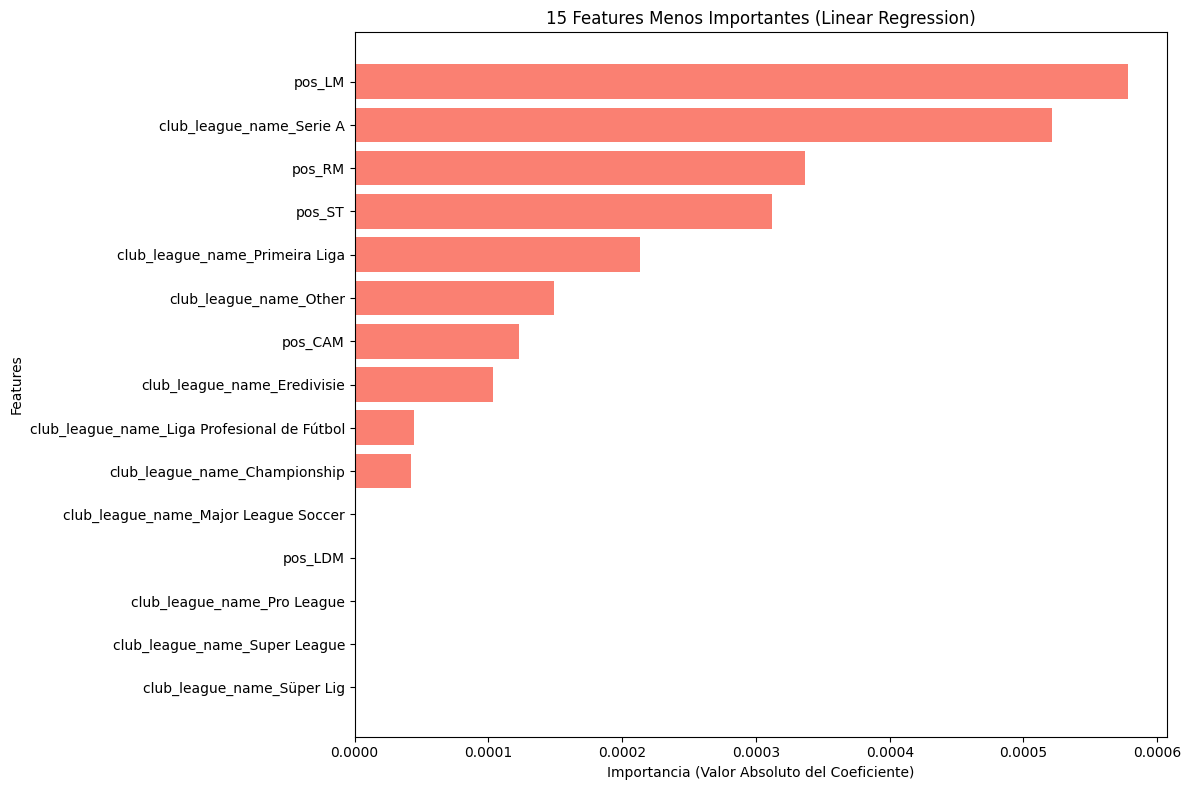

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

features = X_train.columns
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coeficientes
})

feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# CAMBIO: Tomar solo las 15 menos importantes
least_important_15 = feature_importance.tail(15).sort_values(by='Abs_Coefficient', ascending=True)

print("15 FEATURES MENOS IMPORTANTES:")
print(least_important_15)

# Visualización
plt.figure(figsize=(12, 8))
plt.barh(least_important_15['Feature'], least_important_15['Abs_Coefficient'], color='salmon')
plt.title('15 Features Menos Importantes (Linear Regression)')
plt.xlabel('Importancia (Valor Absoluto del Coeficiente)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

##Conclusión



Conseguimos gracias al aprendizaje automatico encontrar el mejor modelo, con xgboost y una gran busqueda de hiperparametros usando Kfold enfocadonos al error MSE en este caso para penalizar más fuerte las subestimaciones o sobreestimaciones grandes, como el caso con jugadores muy caros que son de bastante interes para el usuario pero que son pocos dentro del dataset.

In [35]:
import pickle

def save_model_components(model, onehot_encoders, mlb, feature_columns, target_col, filename_prefix='fifa_model'):
    """
    Guarda todos los componentes necesarios para hacer predicciones
    """
    # Extraer top_leagues si está en el encoder de club_league_name
    top_leagues = None
    if 'club_league_name' in onehot_encoders:
        top_leagues = list(onehot_encoders['club_league_name'].categories_[0])

    components = {
        'model': model,
        'onehot_encoders': onehot_encoders,
        'mlb': mlb,
        'feature_columns': feature_columns,
        'target_col': target_col,
        'model_type': type(model).__name__,
        'top_leagues': top_leagues
    }

    filename = f"{filename_prefix}.pkl"

    with open(filename, 'wb') as f:
        pickle.dump(components, f)

    print(f"✅ Modelo y componentes guardados en: {filename}")
    print(f"📊 Componentes guardados:")
    print(f"   - Modelo: {type(model).__name__}")
    print(f"   - OneHot Encoders: {len(onehot_encoders) if onehot_encoders else 0}")
    print(f"   - MultiLabel Binarizer: {'Sí' if mlb else 'No'}")
    print(f"   - Features: {len(feature_columns)}")
    print(f"   - Target: {target_col}")
    print(f"   - Top Ligas: {len(top_leagues) if top_leagues else 0}")


save_model_components(
    model=best_model,
    onehot_encoders=label_encoders,
    mlb=mlb,
    feature_columns=X_train.columns.tolist(),
    target_col=target_col
)

✅ Modelo y componentes guardados en: fifa_model.pkl
📊 Componentes guardados:
   - Modelo: Pipeline
   - OneHot Encoders: 1
   - MultiLabel Binarizer: Sí
   - Features: 39
   - Target: value
   - Top Ligas: 15


In [36]:
def load_model_components(filename='fifa_model.pkl'):
    """
    Carga todos los componentes del modelo
    """
    try:
        with open(filename, 'rb') as f:
            components = pickle.load(f)

        print(f"✅ Modelo cargado desde: {filename}")
        print(f"📊 Componentes cargados:")
        print(f"   - Modelo: {components['model_type']}")
        print(f"   - OneHot Encoders: {len(components['onehot_encoders']) if components['onehot_encoders'] else 0}")
        print(f"   - MultiLabel Binarizer: {'Sí' if components['mlb'] else 'No'}")
        print(f"   - Features: {len(components['feature_columns'])}")
        print(f"   - Target: {components['target_col']}")
        if 'top_leagues' in components and components['top_leagues']:
            print(f"   - Top Ligas: {len(components['top_leagues'])}")
        else:
            print(f"   - Top Ligas: No especificadas")
        return components

    except FileNotFoundError:
        print(f"❌ Error: No se encontró el archivo {filename}")
        return None
    except Exception as e:
        print(f"❌ Error cargando modelo: {e}")
        return None

# Cargar el modelo
model_components = load_model_components()

✅ Modelo cargado desde: fifa_model.pkl
📊 Componentes cargados:
   - Modelo: Pipeline
   - OneHot Encoders: 1
   - MultiLabel Binarizer: Sí
   - Features: 39
   - Target: value
   - Top Ligas: 15


In [ ]:
def preprocess_new_data(new_data, model_components):
    """
    Preprocesa nuevos datos usando los encoders guardados
    """
    if model_components is None:
        print("❌ Error: Componentes del modelo no cargados")
        return None

    print("🔄 Preprocesando nuevos datos...")
    data_processed = new_data.copy()

    onehot_encoders = model_components['onehot_encoders']
    mlb = model_components['mlb']
    target_col = model_components['target_col']

    # Identificar columnas categóricas y numéricas
    categorical_cols = data_processed.select_dtypes(include=['object']).columns.tolist()
    numerical_cols = data_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Remover target si está presente
    if target_col in categorical_cols:
        categorical_cols.remove(target_col)
    if target_col in numerical_cols:
        numerical_cols.remove(target_col)

    # Columnas especiales
    special_multi_col = 'positions'
    binary_col = 'preferred_foot'
    league_col = 'club_league_name'

    for col in [special_multi_col, binary_col, league_col]:
        if col in categorical_cols:
            categorical_cols.remove(col)

    # Manejar valores nulos
    for col in categorical_cols:
        if data_processed[col].isnull().any():
            data_processed[col] = data_processed[col].fillna('Unknown')

    for col in numerical_cols:
        if data_processed[col].isnull().any():
            median_val = data_processed[col].median()
            data_processed[col] = data_processed[col].fillna(median_val)

    # Codificar preferred_foot como binario
    if binary_col in new_data.columns:
        print(f"Codificando '{binary_col}' como binario...")
        data_processed[binary_col] = data_processed[binary_col].fillna('Unknown')
        data_processed[binary_col] = data_processed[binary_col].map({'Left': 0, 'Right': 1}).fillna(-1).astype(int)

    # Codificar club_league_name con top 10 ligas
    if league_col in new_data.columns and league_col in onehot_encoders:
        print(f"Codificando '{league_col}' con OneHotEncoder (top 10 ligas)...")
        data_processed[league_col] = data_processed[league_col].fillna('Unknown')

        # Agrupar ligas no vistas como 'Other'
        known_leagues = list(onehot_encoders[league_col].categories_[0])
        data_processed[league_col] = data_processed[league_col].apply(
            lambda x: x if x in known_leagues else 'Other'
        )

        encoded_cols = onehot_encoders[league_col].transform(data_processed[[league_col]])
        col_names = [f"{league_col}_{cat}" for cat in onehot_encoders[league_col].categories_[0][1:]]
        encoded_df = pd.DataFrame(encoded_cols, columns=col_names, index=data_processed.index)
        data_processed = data_processed.drop(columns=[league_col])
        data_processed = pd.concat([data_processed, encoded_df], axis=1)

    # Aplicar OneHotEncoders para otras columnas categóricas
    for col in categorical_cols:
        if col in onehot_encoders:
            data_processed[col] = data_processed[col].fillna('Unknown')
            encoded_cols = onehot_encoders[col].transform(data_processed[[col]])
            col_names = [f"{col}_{cat}" for cat in onehot_encoders[col].categories_[0][1:]]
            encoded_df = pd.DataFrame(encoded_cols, columns=col_names, index=data_processed.index)
            data_processed = data_processed.drop(columns=[col])
            data_processed = pd.concat([data_processed, encoded_df], axis=1)

    # Procesar player_positions si existe
    if special_multi_col in new_data.columns and mlb is not None:
        data_processed[special_multi_col] = data_processed[special_multi_col].fillna('Unknown')
        multilabel_values = data_processed[special_multi_col].str.split(',\s*')
        position_dummies = pd.DataFrame(mlb.transform(multilabel_values),
                                        columns=[f"pos_{cls}" for cls in mlb.classes_],
                                        index=data_processed.index)
        data_processed = pd.concat([data_processed.drop(columns=[special_multi_col]), position_dummies], axis=1)

    # Asegurar que tenemos todas las columnas del modelo entrenado
    expected_features = model_components['feature_columns']
    missing_cols = set(expected_features) - set(data_processed.columns)

    if missing_cols:
        print(f"⚠️  Columnas faltantes: {missing_cols}")
        for col in missing_cols:
            data_processed[col] = 0

    # Ordenar columnas
    data_processed = data_processed[expected_features]

    print(f"✅ Datos preprocesados: {data_processed.shape}")
    return data_processed

def predict_new_data(new_data, model_components):
    """
    Hace predicciones en nuevos datos
    """
    if model_components is None:
        return None

    # Preprocesar datos
    X_new = preprocess_new_data(new_data, model_components)
    if X_new is None:
        return None

    # Hacer predicciones
    model = model_components['model']
    predictions = model.predict(X_new)

    # Si es clasificador, también obtener probabilidades
    if hasattr(model, 'predict_proba'):
        probabilities = model.predict_proba(X_new)
        return predictions, probabilities

    return predictions

In [ ]:
def test_model_on_new_data(new_data_path=None, new_data_df=None):
    """
    Prueba el modelo en nuevos datos
    """
    # Cargar nuevos datos
    if new_data_df is not None:
        new_data = new_data_df.copy()
        print("📊 Usando datos proporcionados")
    elif new_data_path:
        new_data = pd.read_csv(new_data_path)
        print(f"📊 Datos cargados desde: {new_data_path}")
    else:
        print("❌ Error: Proporciona nuevos datos (DataFrame o ruta)")
        return

    print(f"📈 Nuevos datos: {new_data.shape}")

    # Cargar modelo
    components = load_model_components()
    if components is None:
        return

    # Hacer predicciones
    results = predict_new_data(new_data, components)

    if results is None:
        print("❌ Error en las predicciones")
        return

    # Procesar resultados
    if isinstance(results, tuple):  # Clasificador con probabilidades
        predictions, probabilities = results
        print(f"\n🎯 Predicciones realizadas: {len(predictions)}")
        print(f"📊 Distribución de predicciones:")
        unique, counts = np.unique(predictions, return_counts=True)
        for val, count in zip(unique, counts):
            print(f"   Clase {val}: {count} ({count/len(predictions):.1%})")

        # Agregar predicciones al DataFrame
        new_data['predicted_class'] = predictions
        new_data['predicted_probability'] = probabilities.max(axis=1)

    else:  # Regresor
        predictions = results
        print(f"\n🎯 Predicciones realizadas: {len(predictions)}")
        print(f"📊 Estadísticas de predicciones:")
        print(f"   Media: {predictions.mean():.2f}")
        print(f"   Mediana: {np.median(predictions):.2f}")
        print(f"   Min: {predictions.min():.2f}")
        print(f"   Max: {predictions.max():.2f}")

        # Agregar predicciones al DataFrame
        new_data['predicted_value'] = predictions

    return new_data

In [ ]:
# Install necessary packages
!pip install selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd

!apt-get update
!apt-get install -y chromium chromium-driver
!pip install selenium

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import time

# Set up Chrome options for headless mode
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')  # Run in headless mode
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
names=[]
ratings=[]
strongfoot=[]
weakfoot=[]
position = []
sidePosition = []
skill_moves = []
pace = []
shooting = []
passing = []
dribbling = []
defending = []
physic = []
body= []
age=[]
weight=[]
price=[]
nation = []
league = []
club = []
card_type = []

player = 'pedro'

link=f'https://www.futbin.com/players?search={player}&showStats=Age%2CWeight&gender=men'
driver = webdriver.Chrome(options=chrome_options)
driver.get(link)
time.sleep(5)

tbody_rows=driver.find_elements(By.CLASS_NAME,'player-row')

for row in tbody_rows:
    names.append(row.find_element(By.CLASS_NAME,'table-player-name').text)
    ratings.append(row.find_element(By.CLASS_NAME,'player-rating-card-text').text)
    position.append(row.find_element(By.CLASS_NAME,'table-pos-main').text)
    print(names[-1])
    try:
        sidePosition.append(row.find_element(By.CLASS_NAME,'table-pos').find_element(By.CLASS_NAME,'text-faded').text)
    except:
        sidePosition.append(None)
    price.append(row.find_element(By.CLASS_NAME,'price').text)
    weakfoot.append(row.find_element(By.CLASS_NAME,'table-weak-foot').text)
    card_type.append(row.find_element(By.CLASS_NAME,'table-player-revision').text)
    skill_moves.append(row.find_element(By.CLASS_NAME,'table-skills').text)
    pace.append(row.find_element(By.CLASS_NAME,'table-key-stats').text)
    shooting.append(row.find_element(By.CLASS_NAME,'table-shooting').text)
    passing.append(row.find_element(By.CLASS_NAME,'table-passing').text)
    dribbling.append(row.find_element(By.CLASS_NAME,'table-dribbling').text)
    defending.append(row.find_element(By.CLASS_NAME,'table-defending').text)
    physic.append(row.find_element(By.CLASS_NAME,'table-physicality').text)
    body.append(row.find_element(By.CLASS_NAME,'table-height').text)
    age.append(row.find_element(By.CLASS_NAME,'table-age').text)
    weight.append(row.find_element(By.CLASS_NAME,'table-weight').text)
    nation.append(row.find_element(By.CLASS_NAME,'table-player-nation').find_element(By.TAG_NAME,'img').get_attribute('title'))
    league.append(row.find_element(By.CLASS_NAME,'table-player-league').find_element(By.TAG_NAME,'img').get_attribute('title'))
    club.append(row.find_element(By.CLASS_NAME,'table-player-club').find_element(By.TAG_NAME,'img').get_attribute('title'))
    player_strongfoot=row.find_element(By.CLASS_NAME,'table-foot').find_element(By.TAG_NAME,'img').get_attribute('src')
    if 'right' in player_strongfoot:
        strongfoot.append('Right')
    else:
        strongfoot.append('Left')

driver.quit()

João Pedro Gonçalves Neves
João Pedro Gonçalves Neves
Pedro Antonio Porro Sauceda
Pedro González López
Pedro Lomba Neto
João Pedro Gonçalves Neves
Pedro Lomba Neto
Pedro Rodríguez Ledesma
João Pedro Cavaco Cancelo
Pedro Bigas Rigo
João Pedro Gonçalves Neves
Pedro Rodríguez Ledesma
João Pedro Cavaco Cancelo
Pedro González López
Pedro Antonio Porro Sauceda
Pedro Lomba Neto
Pedro Lomba Neto
Pedro González López
João Pedro Neves Filipe
Pedro González López
Pedro Rodríguez Ledesma
João Pedro Cavaco Cancelo
João Pedro Cavaco Cancelo
Pedro González López
João Pedro Cavaco Cancelo
João Pedro Junqueira de Jesus
Pedro Miguel Braga Rebocho
Pedro Antonio Porro Sauceda
Pedro António Pereira Gonçalves
Pedro Jorge Gonçalves Malheiro


In [ ]:
players={
    'Name': names,
    'overall': ratings,
    'Position': position,
    'Side Position': sidePosition,
    'price': price,
    'weak_foot': weakfoot,
    'skill_moves': skill_moves,
    'pace': pace,
    'shooting': shooting,
    'passing': passing,
    'dribbling': dribbling,
    'defending': defending,
    'physic': physic,
    'Body Type': body,
    'age': age,
    'weight_kg': weight,
    'preferred_foot': strongfoot,
    'league_name': league,
    'card': card_type
}
players_df=pd.DataFrame(players)

players_df['height_cm'] = players_df['Body Type'].str.split('|').str[0].str.strip()

players_df = players_df.drop('Body Type', axis=1)

# Remove 'cm' from 'height_cm' and convert to numeric
players_df['height_cm'] = players_df['height_cm'].str.replace('cm', '').astype(int)

# Remove 'kg' from 'weight_kg' and convert to numeric
players_df['weight_kg'] = players_df['weight_kg'].str.replace('kg', '').astype(int)

players_df['player_positions'] = (
    players_df['Position'].str.replace(r'\+\+', '', regex=True).str.strip() + ', ' +
    players_df['Side Position'].str.replace(r'\+\+', '', regex=True).str.replace(r'\s*,\s*', ', ', regex=True).str.strip()
).str.strip(', ')

players_df = players_df.drop(['Position', 'Side Position'], axis=1)

league_mapping = {
    'Liga Profesional de Fútbol': 'LPF',
    '1. Division': 'Unknown',
    '2. Bundesliga': 'Bundesliga 2',
    '3. Liga': '3. Liga',
    'A-League Men': 'A-League',
    'Allsvenskan': 'Allsvenskan',
    'Bundesliga': 'Bundesliga',
    'Categoría Primera A': 'Liga Colombia',
    'Championship': 'EFL Championship',
    'División Profesional': 'Unknown',
    'División de Fútbol Profesional': 'Unknown',
    'Ekstraklasa': 'PKO BP Ekstraklasa',
    'Eliteserien': 'Eliteserien',
    'Eredivisie': 'Eredivisie',
    'Hrvatska nogometna liga': 'Liga Hrvatska',
    'K League 1': 'K League 1',
    'La Liga': 'LALIGA EA SPORTS',
    'La Liga 2': 'LALIGA HYPERMOTION',
    'League One': 'EFL League One',
    'League Two': 'EFL League Two',
    'Liga 1': 'SUPERLIGA',
    'Liga I': 'SUPERLIGA',
    'Ligue 1': 'Ligue 1 Uber Eats',
    'Ligue 2': 'Ligue 2 BKT',
    'Major League Soccer': 'MLS',
    'Nemzeti Bajnokság I': 'Unknown',
    'Premier Division': 'SSE Airtricity PD',
    'Premier League': 'Premier League',
    'Premiership': 'cinch Prem',
    'Premyer Liqa': 'Unknown',
    'Primeira Liga': 'Liga Portugal',
    'Primera Division': 'Unknown',
    'Primera División': 'Unknown',
    'Pro League': '1A Pro League',
    'První liga': 'Česká Liga',
    'Serie A': 'Serie A TIM',
    'Serie B': 'Serie BKT',
    'Super League': 'CSSL',
    'Superliga': '3F Superliga',
    'Série A': 'Libertadores',
    'Süper Lig': 'Trendyol Süper Lig',
    'Veikkausliiga': 'Finnliiga'
}


fifa_to_full_league = {v: k for k, v in league_mapping.items()}

# Aplicar mapeo a 'league_name'
players_df['league_name'] = players_df['league_name'].map(fifa_to_full_league).fillna('Unknown')

print(players_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              30 non-null     object
 1   overall           30 non-null     object
 2   price             30 non-null     object
 3   weak_foot         30 non-null     object
 4   skill_moves       30 non-null     object
 5   pace              30 non-null     object
 6   shooting          30 non-null     object
 7   passing           30 non-null     object
 8   dribbling         30 non-null     object
 9   defending         30 non-null     object
 10  physic            30 non-null     object
 11  age               30 non-null     object
 12  weight_kg         30 non-null     int64 
 13  preferred_foot    30 non-null     object
 14  league_name       30 non-null     object
 15  card              30 non-null     object
 16  height_cm         30 non-null     int64 
 17  player_positions  

In [ ]:
numeric_cols = [
    'age', 'height_cm', 'weight_kg', 'weak_foot', 'skill_moves',
    'overall', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic'
]

# Convertir a numérico
for col in numeric_cols:
    players_df[col] = pd.to_numeric(players_df[col], errors='coerce')


In [ ]:
players_df['player_id'] = players_df.index


In [ ]:
print(players_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              30 non-null     object
 1   overall           30 non-null     int64 
 2   price             30 non-null     object
 3   weak_foot         30 non-null     int64 
 4   skill_moves       30 non-null     int64 
 5   pace              30 non-null     int64 
 6   shooting          30 non-null     int64 
 7   passing           30 non-null     int64 
 8   dribbling         30 non-null     int64 
 9   defending         30 non-null     int64 
 10  physic            30 non-null     int64 
 11  age               30 non-null     int64 
 12  weight_kg         30 non-null     int64 
 13  preferred_foot    30 non-null     object
 14  league_name       30 non-null     object
 15  card              30 non-null     object
 16  height_cm         30 non-null     int64 
 17  player_positions  

In [ ]:
# Variables útiles para entrenamiento
categorical_features = ['league_name', 'preferred_foot', 'player_positions']
numeric_features = [
    'age', 'height_cm', 'weight_kg', 'weak_foot', 'skill_moves',
    'overall', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic'
]

# Dataset con solo features para el modelo
test_data = players_df[categorical_features + numeric_features + ['player_id']]

# Dataset con metadatos que te querés quedar para después
meta = players_df[['player_id', 'Name', 'card', 'price']]


In [ ]:
test_data = test_model_on_new_data(new_data_df=test_data)


📊 Usando datos proporcionados
📈 Nuevos datos: (30, 16)
✅ Modelo cargado desde: fifa_model.pkl
📊 Componentes cargados:
   - Modelo: Pipeline
   - OneHot Encoders: 2
   - MultiLabel Binarizer: Sí
   - Features: 78
   - Target: value_eur
🔄 Preprocesando nuevos datos...
✅ Datos preprocesados: (30, 78)

🎯 Predicciones realizadas: 30
📊 Estadísticas de predicciones:
   Media: 63603072.00
   Mediana: 72147256.00
   Min: 25777130.00
   Max: 91303912.00


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:900: UserWarning: unknown class(es) ['Unknown'] will be ignored
  warnings.warn(


In [ ]:
# Unimos por 'player_id'
final_results = pd.merge(test_data, meta, on='player_id', how='left')

# Reordenamos columnas para una mejor presentación
cols_order = ['Name', 'card', 'price', 'predicted_value', 'overall', 'age'] + \
             [col for col in final_results.columns if col not in ['Name', 'card', 'price', 'predicted_value', 'overall', 'age']]

final_results = final_results[cols_order]
pd.set_option('display.float_format', '{:.2f}'.format)
# Mostramos la tabla formateada
with pd.option_context('display.max_columns', None, 'display.max_rows', None, 'display.width', 1000):
    print(final_results)


                               Name                  card    price  predicted_value  overall  age                   league_name preferred_foot  player_positions  height_cm  weight_kg  weak_foot  skill_moves  pace  shooting  passing  dribbling  defending  physic  player_id
0        João Pedro Gonçalves Neves        Star Performer    2.23M      89759072.00       97   20                French Ligue 1          Right        RB, RM, CM        174         66          5            5    95        88       94         98         94      95          0
1        João Pedro Gonçalves Neves                  TOTS     146K      90010184.00       96   20                French Ligue 1          Right           CM, CDM        174         66          4            5    94        87       92         96         91      94          1
2       Pedro Antonio Porro Sauceda              UEL Live     440K      83387752.00       96   25        English Premier League          Right               NaN        173         6